Continued from model_1 notebook

In [1]:
import pickle
import pandas as pd
import numpy as np
import cv2
from keras.models import Model, load_model, Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
data = pickle.load(open('cleaned_training.p', 'rb'))

In [3]:
from data_functions import create_training_data

In [4]:
X, Y_root, Y_vowel, Y_consonant = create_training_data(data)

In [9]:
x_train, x_test, y_train_root, y_test_root, y_train_vowel, y_test_vowel, y_train_consonant, y_test_consonant = train_test_split(X, Y_root, Y_vowel, Y_consonant, test_size=0.05, random_state=42)
y_train = [y_train_root, y_train_vowel, y_train_consonant]
y_test = [y_test_root, y_test_vowel, y_test_consonant]

For my second model, I'm adding an extra convolution layer.

In [6]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = Conv2D(filters=32, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Dropout(rate=0.3)(model)

model = Flatten()(model)
model = Dense(1024, activation = 'relu')(model)
model = Dense(512, activation = 'relu')(model)
dense = Dense(256, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

In [7]:
from create_models import ModelEvaluation

In [8]:
mymodel = ModelEvaluation(model)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 32)   9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 32)   128         conv2d_2[0][0]                   
____________________________________________________________________________________________

In [12]:
mymodel.train(x_train, y_train, epochs= 16, batch_size= 256, validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/16
171718/171718 [==============================] - 132s 769us/step - loss: 5.3421 - dense_4_loss: 3.7590 - dense_5_loss: 0.8494 - dense_6_loss: 0.7333 - dense_4_accuracy: 0.1425 - dense_5_accuracy: 0.7176 - dense_6_accuracy: 0.7510 - val_loss: 3.8103 - val_dense_4_loss: 2.7767 - val_dense_5_loss: 0.5176 - val_dense_6_loss: 0.5171 - val_dense_4_accuracy: 0.2833 - val_dense_5_accuracy: 0.8200 - val_dense_6_accuracy: 0.8145
Epoch 2/16
171718/171718 [==============================] - 128s 747us/step - loss: 3.1961 - dense_4_loss: 2.3060 - dense_5_loss: 0.4466 - dense_6_loss: 0.4434 - dense_4_accuracy: 0.3803 - dense_5_accuracy: 0.8446 - dense_6_accuracy: 0.8400 - val_loss: 3.0256 - val_dense_4_loss: 2.1638 - val_dense_5_loss: 0.4421 - val_dense_6_loss: 0.4196 - val_dense_4_accuracy: 0.4082 - val_dense_5_accuracy: 0.8461 - val_dense_6_accuracy: 0.8502
Epoch 3/16
171718/171718 [==============================] - 128s 746us/step - los

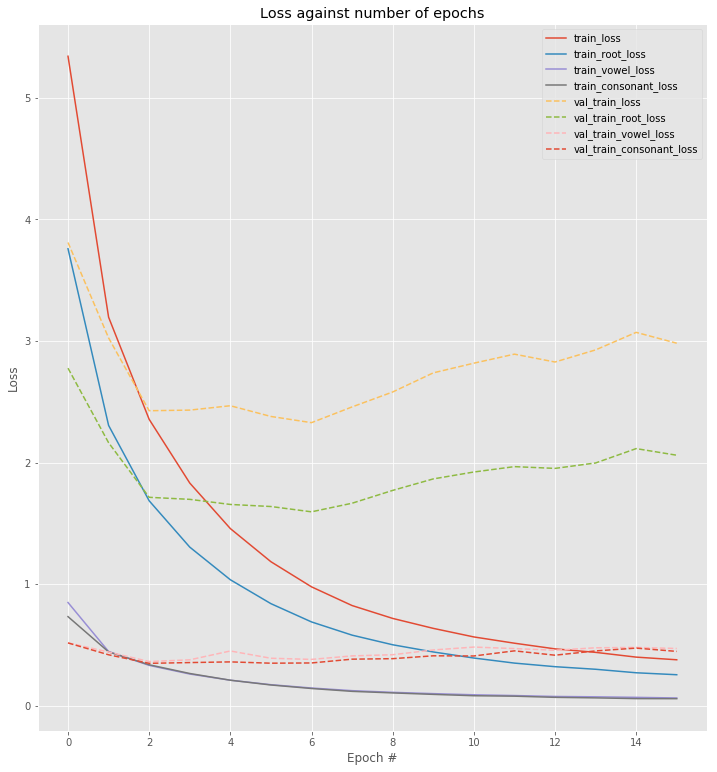

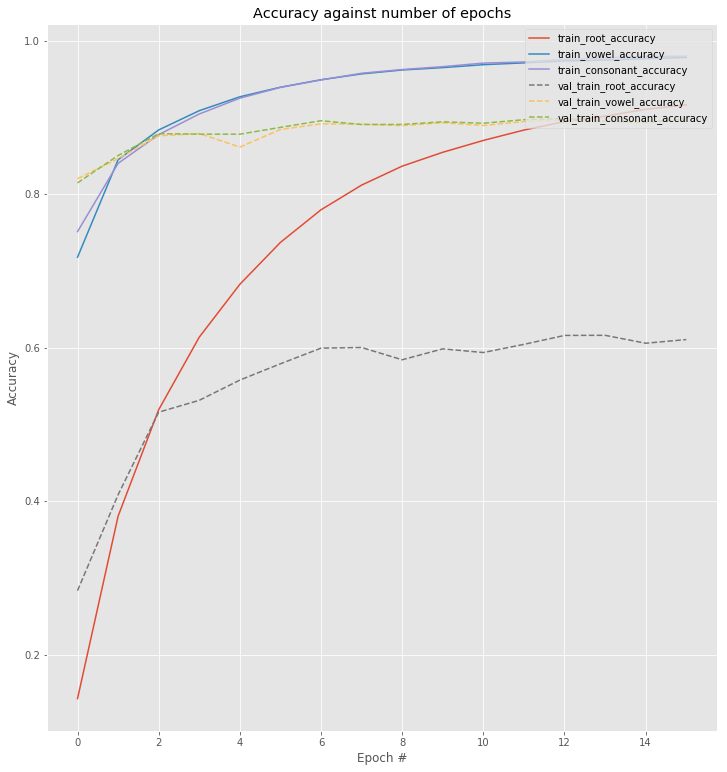

In [14]:
mymodel.plot_metrics()

In [15]:
mymodel.save_model()

My model is still struggling to classify the grapheme root. I added more dense layers to try and improve the performance.

In [16]:
inputs = Input(shape = (64, 64, 1))

model = Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu', input_shape=(64, 64, 1))(inputs)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Conv2D(filters=32, kernel_size= (3,3), padding='SAME', activation='relu')(model)
model = BatchNormalization(momentum=0.15)(model)
model = MaxPool2D(pool_size=(2, 2))(model)
model = Dropout(rate=0.3)(model)

model = Flatten()(model)
model = Dense(1024, activation = "relu")(model)
model = Dense(512, activation = 'relu')(model)
dense = Dense(256, activation = 'relu')(model)

root = Dense(168, activation = 'softmax')(dense)
vowel = Dense(11, activation = 'softmax')(dense)
consonant = Dense(7, activation = 'softmax')(dense)

model = Model(inputs=inputs, outputs=[root, vowel, consonant])

In [17]:
mymodel = ModelEvaluation(model)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 64, 64, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 32, 32, 32)   0           conv2d_3[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 32, 32, 32)   9248        max_pooling2d_2[0][0]            
____________________________________________________________________________________________

In [21]:
mymodel.train(x_train, y_train, epochs= 32, batch_size= 256, validation_split= 0.1)

Train on 171718 samples, validate on 19080 samples
Epoch 1/32
171718/171718 [==============================] - 54s 312us/step - loss: 5.1504 - dense_10_loss: 3.6611 - dense_11_loss: 0.8050 - dense_12_loss: 0.6837 - dense_10_accuracy: 0.1542 - dense_11_accuracy: 0.7228 - dense_12_accuracy: 0.7620 - val_loss: 3.4745 - val_dense_10_loss: 2.5386 - val_dense_11_loss: 0.4805 - val_dense_12_loss: 0.4572 - val_dense_10_accuracy: 0.3287 - val_dense_11_accuracy: 0.8316 - val_dense_12_accuracy: 0.8349
Epoch 2/32
171718/171718 [==============================] - 53s 306us/step - loss: 3.0372 - dense_10_loss: 2.2020 - dense_11_loss: 0.4259 - dense_12_loss: 0.4091 - dense_10_accuracy: 0.4019 - dense_11_accuracy: 0.8521 - dense_12_accuracy: 0.8547 - val_loss: 2.5138 - val_dense_10_loss: 1.7950 - val_dense_11_loss: 0.3814 - val_dense_12_loss: 0.3382 - val_dense_10_accuracy: 0.4917 - val_dense_11_accuracy: 0.8671 - val_dense_12_accuracy: 0.8822
Epoch 3/32
171718/171718 [==============================] -

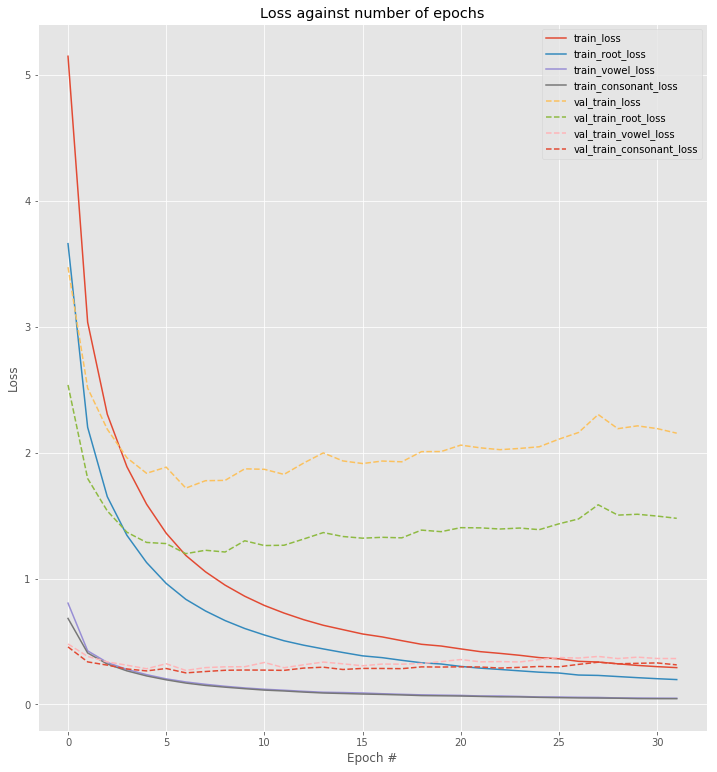

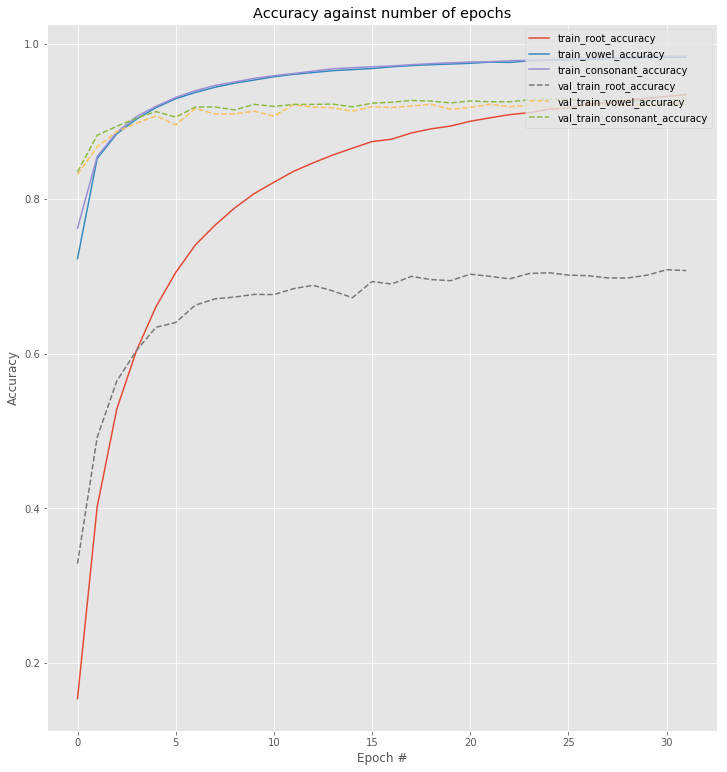

In [22]:
mymodel.plot_metrics()

In [23]:
mymodel.save_model()

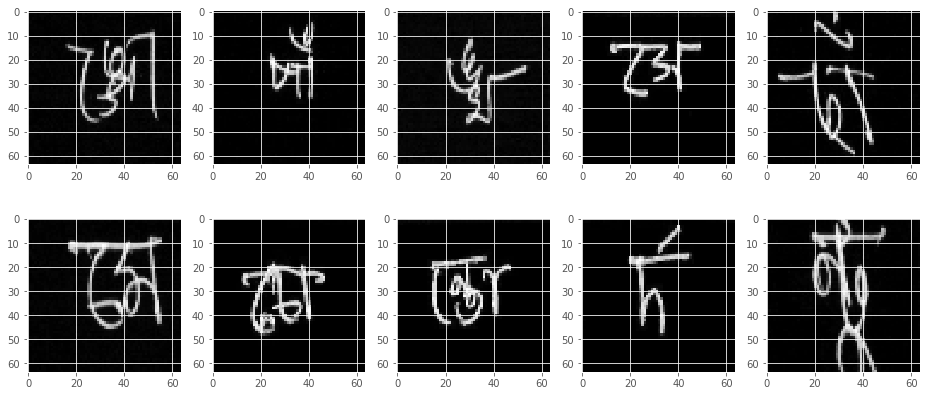

predicted                 true                
             root vowel consonant root vowel consonant
image_0        36     9         0   36     9         0
image_1        96     1         1   96     1         1
image_2        37     0         0   35     0         0
image_3       147     7         0  147     7         0
image_4        42     1         1   42     1         1
image_5       147     7         0  115     7         0
image_6        58     9         0   38     9         0
image_7        86     9         0   86     9         0
image_8        72     0         2   72     0         2
image_9        83     4         0   83     4         0

In [24]:
mymodel.test(x_test, y_test, 10)

The model performance is slowing improving, but the root prediction is limited to approximately 70%. Next steps are to add more blocks of convolution and pooling layers.